# 1.2 Perceptron

In [3]:
import numpy as np
import pandas as pd
from Module import Lineaire
from losses import MSE, Hinge
from tools import get_patches, pad_to_32
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sys
%load_ext autoreload
%autoreload 2

from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

from load_data import get_train_test_loaders

In [17]:
train_loader,test_loader, train_size, test_size = get_train_test_loaders()

In [ ]:
torch.cuda.set_device(0)

dim_in = 28*28 + 1
dim_out = 1

epsilon = 0.0001
model = Lineaire(dim_in, dim_out)
model.initialize_parameters()

train_errors = []
test_errors = []

loss = Hinge()

for epoch in range(40):
    if epoch % 10 == 0:
        print("Epoch {}".format(str(epoch)))
    train_error = 0
    for i,(data, y) in enumerate(train_loader):
        model.grad_zero()
        batch_n = data.size()[0]
        X = data.view(batch_n, -1)
        X = torch.cat((torch.ones((batch_n, 1)), X), 1)
        
        y = y.view(batch_n, 1).float()
        
        z1 = model.forward(X)
        yhat = torch.sign(z1)
        train_error += loss.forward(y,yhat).sum()
                
        delta_Z = loss.backward(y,z1)
        model.backward_update_gradient(X, delta_Z)
        
        model.update_parameters(epsilon)
    train_errors.append(train_error.numpy() / train_size) # mean
    print(train_error)
    
    test_error = 0
    for i,(data, y) in enumerate(test_loader):
        batch_n = data.size()[0]
        X = data.view(batch_n, -1)
        X = torch.cat((torch.ones((batch_n, 1)), X), 1)
        y[y==0] = -1
        y = y.view((batch_n, 1)).float()
                
        yhat = torch.sign(model.forward(X)).float()
        
        test_error += loss.forward(y,yhat).sum()
    test_errors.append(test_error.numpy() / test_size) # mean
    print(test_error)

Dans le prochain figure on a un visualisation des poids de 1 contre 3. Ca montre bien, comment le deux classe sont identifié.

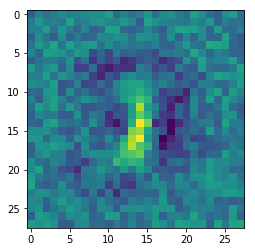

In [23]:
plt.imshow(model.W[0,1:].view(28,28))
#model.W.shape

L'erreur du test et train baisse à la méme temps.

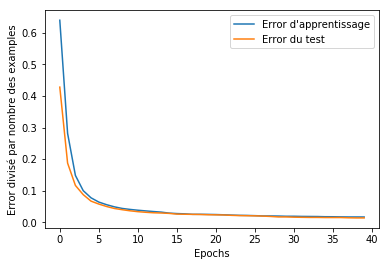

In [24]:
plt.figure()
#plt.ylim([0,0.01])
plt.plot(range(len(train_errors)), train_errors, label="Error d'apprentissage")
plt.plot(range(len(test_errors)), test_errors, label="Error du test")
plt.xlabel('Epochs')
plt.ylabel('Error divisé par nombre des examples')
plt.legend()

Toujours dans la classification binaire entre 1 et 3, nous arrivons à precision 0.9864.

In [26]:
correct = 0
bad_classified_zero = []
bad_classified_one = []
for i,(data, y) in enumerate(test_loader):
        batch_n = data.size()[0]
        batch_n = data.size()[0]
        X = data.view(batch_n, -1)
        X = torch.cat((torch.ones((batch_n, 1)), X), 1)
        #import pdb; pdb.set_trace()
        
        #y[y==0] = -1
        y = y.view((batch_n, 1)).float()
                
        yhat = torch.sign(model.forward(X)).float()
        
        correct += (y == yhat).sum()

        bad_clf_0 = ((y != yhat) * (y == 1))
        bad_clf_1 = ((y != yhat) * (y == -1))
        
        for img0 in data[bad_clf_0]:
            bad_classified_zero.append(img0)
        for img1 in data[bad_clf_1]:
            bad_classified_one.append(img1)

print(correct.float() / test_size)

tensor(0.9864)
